In [1]:
import sys
# Add the src directory to the Python path
sys.path.insert(0, '../src')

In [2]:
from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt

from botcoin.profilers.stock import StockProfiler
from botcoin.utils.stream_data import generate_price_stream
from botcoin.utils.visual.statistics import plot_kde_with_stats, plot_price_histogram_with_stats, plot_fourier_results

In [3]:
symbol = "AMZN"
profiler = StockProfiler()

In [4]:
profile = profiler.profile(symbol)

c:\Users\runfei\projects\Botcoin\notebooks\../src\botcoin\data\historical.py:167: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(
2025-07-08 18:35:24,220 - DataManager - INFO: Data saved to data\AMZN_ohlcv_1m.parquet
c:\Users\runfei\projects\Botcoin\notebooks\../src\botcoin\data\historical.py:167: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(
2025-07-08 18:35:24,814 - DataManager - INFO: Data saved to data\AMZN_ohlcv_1m.parquet
c:\Users\runfei\projects\Botcoin\notebooks\../src\botcoin\data\historical.py:167: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(
2025-07-08 18:35:25,097 - DataManager - INFO: Data saved to data\AMZN_ohlcv_1m.parquet
c:\Users\runfei\projects\Botcoin\notebooks\../src\botcoin\data\historical.py:167: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(
2025-07-08 18:35:25

In [5]:
profiler.print_profile(profile)

Symbol: AMZN
IPO Date: 1997-05-15
Quote: 220.34
Expected Annual Return: 11.63%
Sharpe Ratio: 0.32
Sortino Ratio: 0.35
Beta: 1.39


In [6]:
returns_1min = profile["1min_returns"]
print(f"Profile for {symbol}:")
print(f"Number of 1-minute returns for {symbol}: {len(returns_1min)}")
print(f"Mean 1-minute returns for {symbol}: {returns_1min.mean():.6f}")
print(f"Standard deviation of 1-minute returns for {symbol}: {returns_1min.std():.6f}")
print(f"Max 1-minute return for {symbol}: {returns_1min.max():.6f}")
print(f"Min 1-minute return for {symbol}: {returns_1min.min():.6f}")

Profile for AMZN:
Number of 1-minute returns for AMZN: 6936
Mean 1-minute returns for AMZN: -0.000002
Standard deviation of 1-minute returns for AMZN: 0.000639
Max 1-minute return for AMZN: 0.006693
Min 1-minute return for AMZN: -0.010089


In [7]:
returns_1d = profile["1d_returns"]
print(f"Number of 1-day returns for {symbol}: {len(returns_1d)}")
print(f"Mean 1-day returns for {symbol}: {returns_1d.mean():.6f}")
print(f"Standard deviation of 1-day returns for {symbol}: {returns_1d.std():.6f}")
print(f"Max 1-day return for {symbol}: {returns_1d.max():.6f}")
print(f"Min 1-day return for {symbol}: {returns_1d.min():.6f}")

Number of 1-day returns for AMZN: 1254
Mean 1-day returns for AMZN: -0.000144
Standard deviation of 1-day returns for AMZN: 0.017563
Max 1-day return for AMZN: 0.110272
Min 1-day return for AMZN: -0.078659


In [8]:
# Compute percentage of data within ±1 std
data = returns_1d
mean = data.mean()
std = data.std()
lower_bound = mean - std
upper_bound = mean + std
within_std = data[(data >= lower_bound) & (data <= upper_bound)]
percentage_within_std = len(within_std) / len(data) * 100

print(f"Percentage of 1-day returns within ±1 std for {symbol}: {percentage_within_std:.2f}%")

Percentage of 1-day returns within ±1 std for AMZN: 73.29%


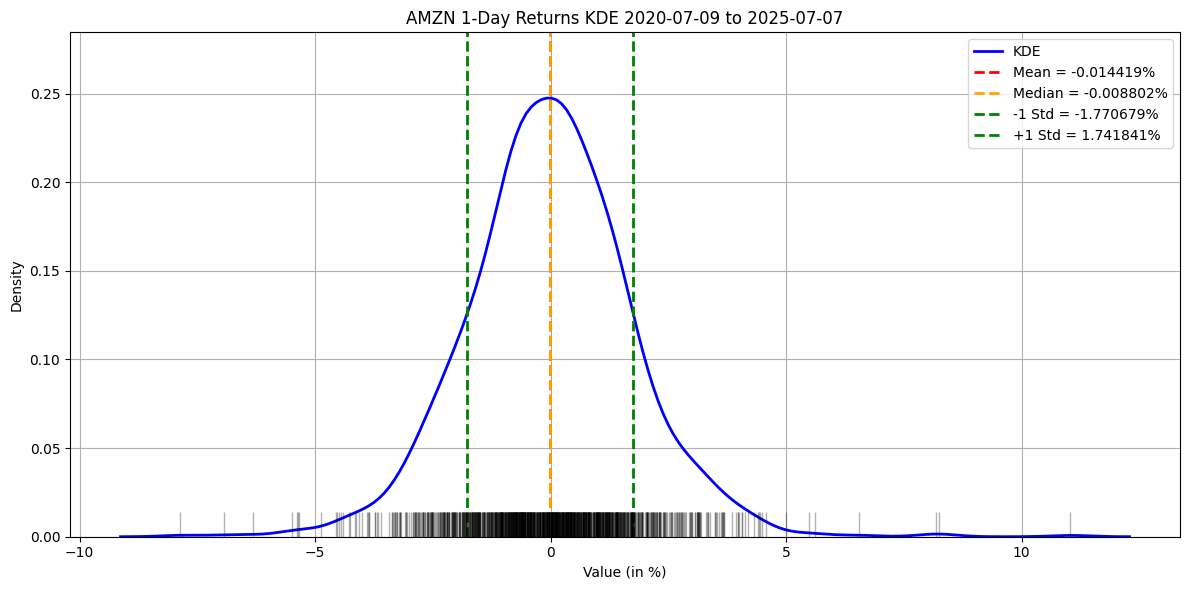

In [9]:
# Compute the date range of the 1-day returns
start_date = data.index.min().date()
end_date = data.index.max().date()

plot_kde_with_stats(returns_1d, title=f"{symbol} 1-Day Returns KDE {start_date} to {end_date}")


In [10]:
ohlcv = profile['ohlcv_1min']

prices = generate_price_stream(ohlcv, candle_duration='1min', avg_freq_per_minute=10)

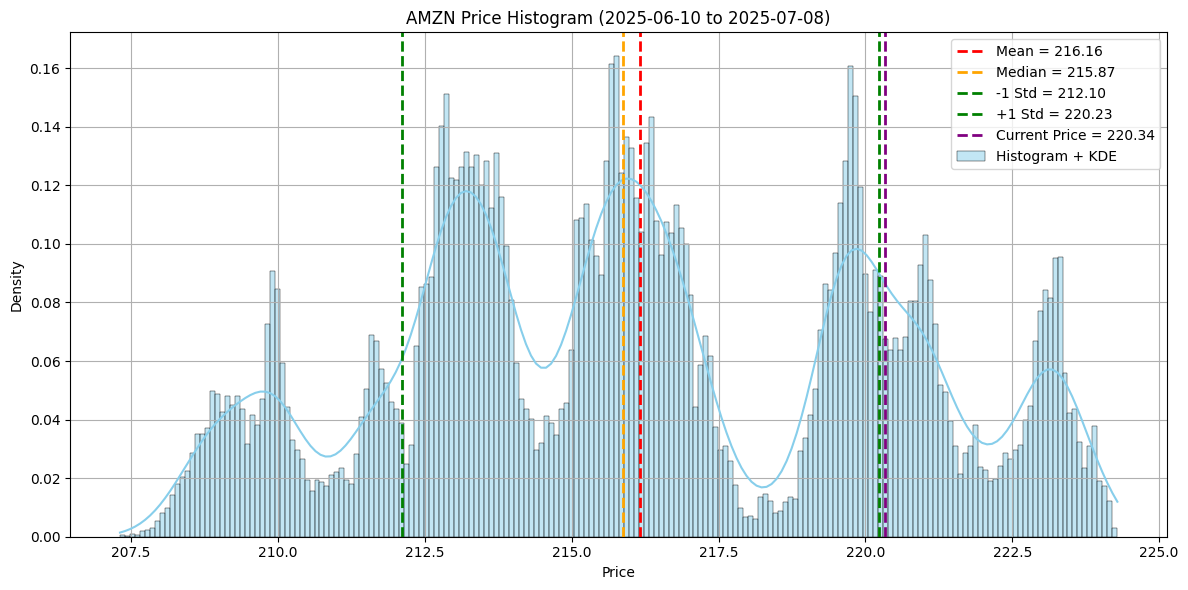

In [11]:
start_time = prices.index.min()
end_time = prices.index.max()

# convert Unix timestamps to datetime objects
start_date = datetime.fromtimestamp(start_time).date()
end_date = datetime.fromtimestamp(end_time).date()

current_price = profile['quote']

plot_price_histogram_with_stats(prices['price'], current_price=current_price, title=f"{symbol} Price Histogram ({start_date} to {end_date})", bins=200)

## Fourier analysis for stock price series.

### Market Cycle Analysis
Traders use Fourier analysis to decompose price movements into component frequencies, helping identify dominant market cycles and seasonal patterns that traditional time-series analysis might miss.

### Limitations
However, research examining the technique has found little to no evidence that it is useful in practice Fourier Analysis: What it Means, How it Works for stock trading specifically. The effectiveness varies significantly depending on the application and market conditions.
The mathematical foundation allows traders to transform time-domain price data into frequency domain, revealing periodic components and enabling more sophisticated analysis of market behavior.

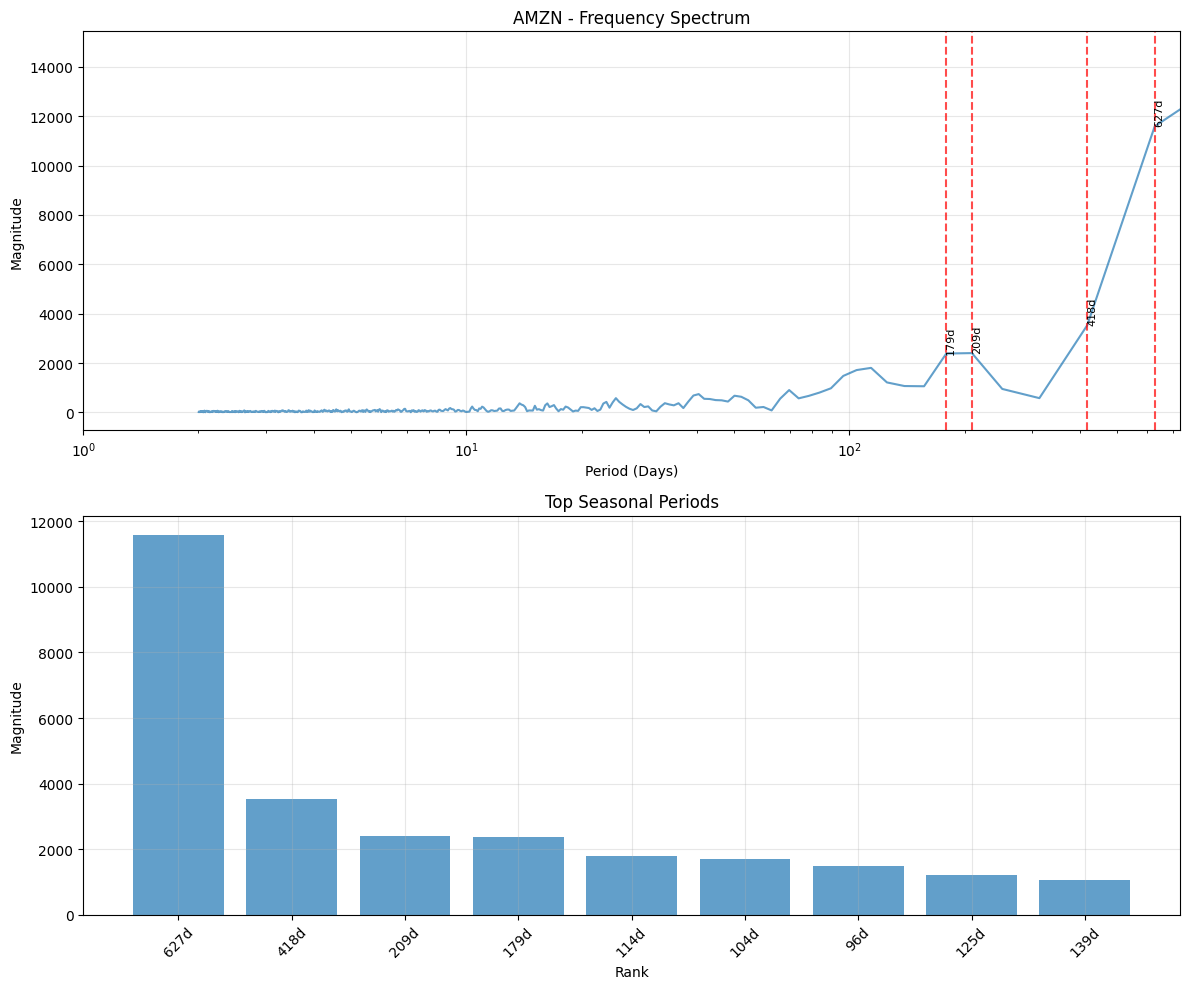

In [12]:
df_1d = profile['df_1d']
returns_1d = df_1d['Close'].values
fourier_results = profiler.fourier_analysis(returns_1d)

periods = fourier_results['periods']
magnitudes = fourier_results['magnitudes']
frequencies = fourier_results['frequencies']

# compute dominant periods and magnitudes
TOP_N = 10  # Number of top periods to display
dominant_indices = np.argsort(magnitudes)[-10:][::-1]  # Top 10
dominant_periods = periods[dominant_indices]
dominant_magnitudes = magnitudes[dominant_indices]

# plot the Fourier analysis results
plot_fourier_results(
    symbol=symbol,
    periods=periods,
    magnitudes=magnitudes,
    dominant_periods=dominant_periods,
    dominant_magnitudes=dominant_magnitudes,
)

2025-07-08 18:35:32,427 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-08 18:35:32,429 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-08 18:35:32,438 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-08 18:35:32,439 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-08 18:35:32,447 

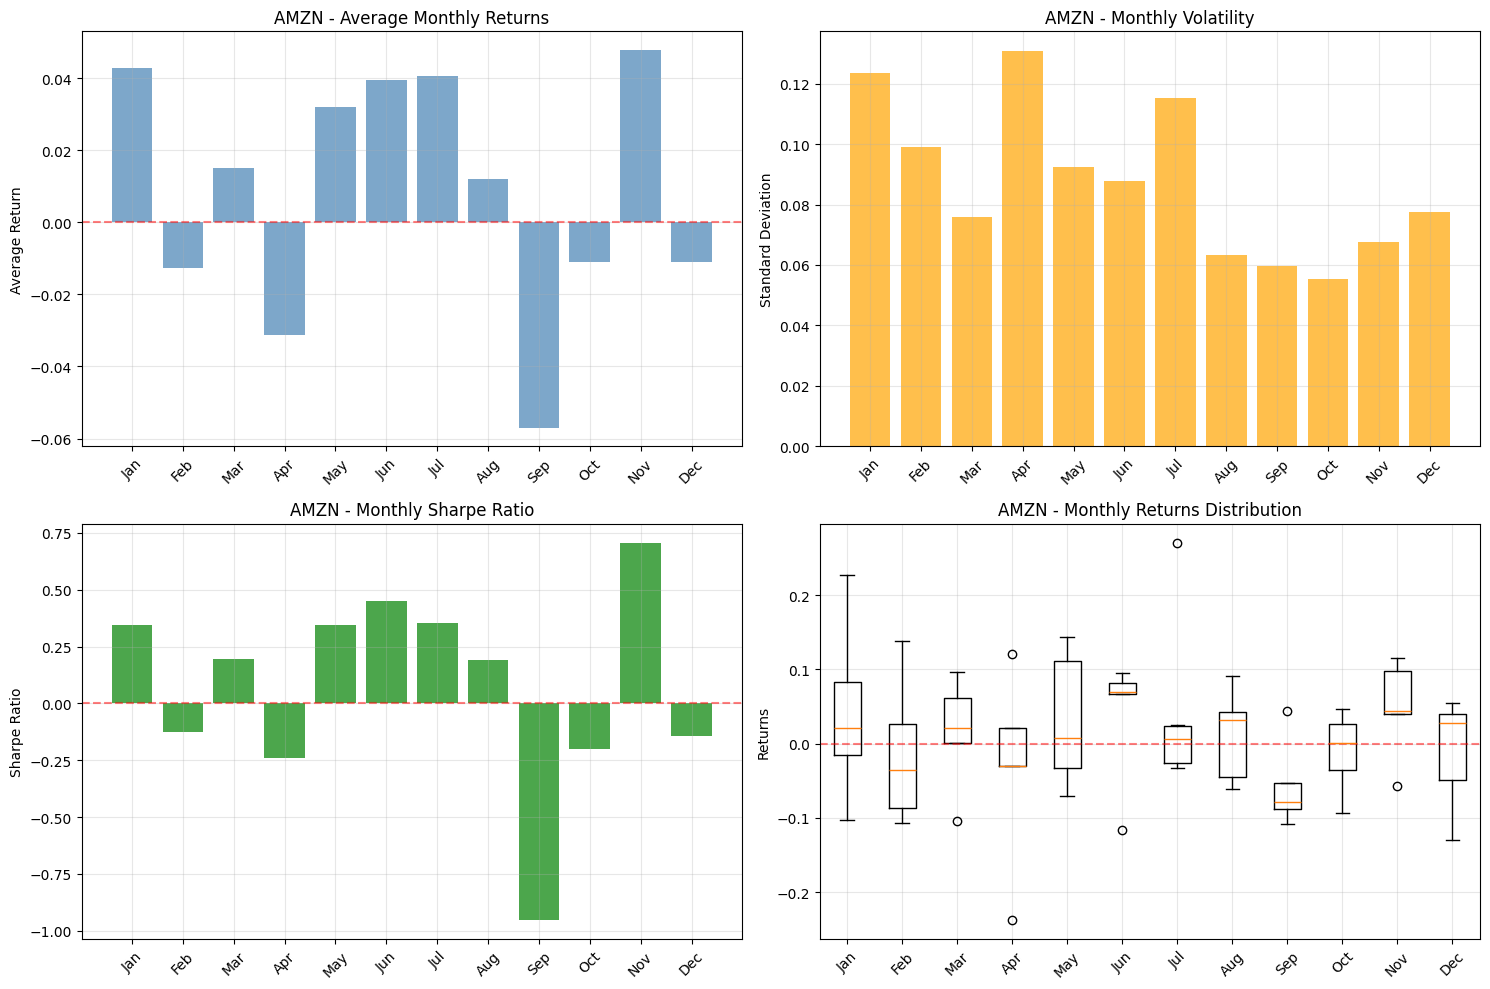

In [13]:
monthly_stats, monthly_returns = profiler.monthly_seasonality(df_1d)

months = [
            "Jan",
            "Feb",
            "Mar",
            "Apr",
            "May",
            "Jun",
            "Jul",
            "Aug",
            "Sep",
            "Oct",
            "Nov",
            "Dec",
        ]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Monthly average returns
ax1.bar(months, monthly_stats["mean"].values, alpha=0.7, color="steelblue")
ax1.set_title(f"{symbol} - Average Monthly Returns")
ax1.set_ylabel("Average Return")
ax1.tick_params(axis="x", rotation=45)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color="red", linestyle="--", alpha=0.5)

# Monthly volatility
ax2.bar(months, monthly_stats["std"].values, alpha=0.7, color="orange")
ax2.set_title(f"{symbol} - Monthly Volatility")
ax2.set_ylabel("Standard Deviation")
ax2.tick_params(axis="x", rotation=45)
ax2.grid(True, alpha=0.3)

# Monthly Sharpe ratio
ax3.bar(months, monthly_stats["sharpe"].values, alpha=0.7, color="green")
ax3.set_title(f"{symbol} - Monthly Sharpe Ratio")
ax3.set_ylabel("Sharpe Ratio")
ax3.tick_params(axis="x", rotation=45)
ax3.grid(True, alpha=0.3)
ax3.axhline(y=0, color="red", linestyle="--", alpha=0.5)

# Box plot of monthly returns distribution
monthly_returns_pivot = monthly_returns.pivot(
    index="year", columns="month", values="returns"
)
box_data = [monthly_returns_pivot[i].dropna().values for i in range(1, 13)]
ax4.boxplot(box_data, labels=months)
ax4.set_title(f"{symbol} - Monthly Returns Distribution")
ax4.set_ylabel("Returns")
ax4.tick_params(axis="x", rotation=45)
ax4.grid(True, alpha=0.3)
ax4.axhline(y=0, color="red", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

2025-07-08 18:35:32,969 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-08 18:35:32,971 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\runfei\AppData\Local\Temp\ipykernel_29308\322531020.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(box_data, labels=weekdays)


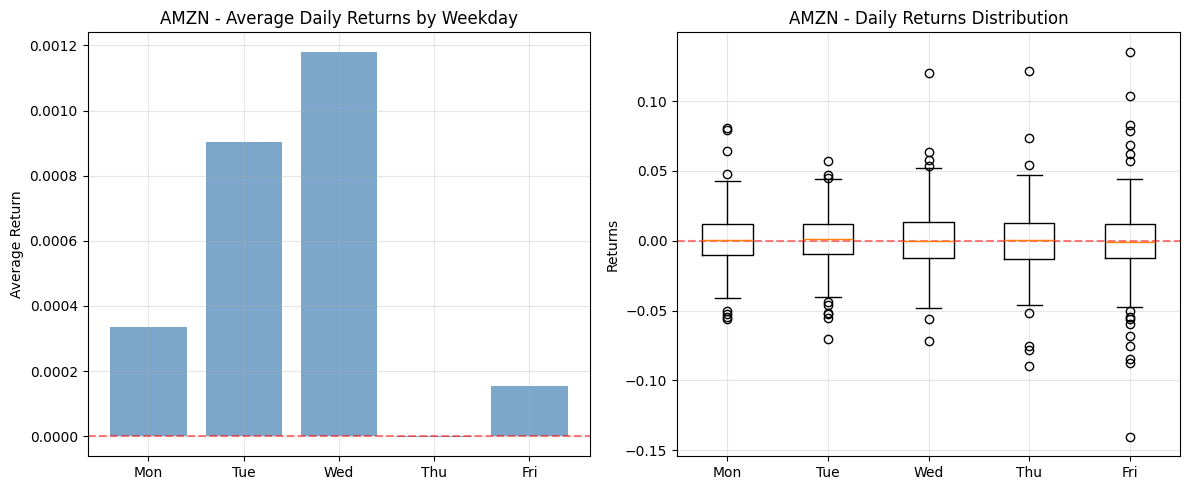

In [14]:
weekday_stats, weekly_data = profiler.weekly_seasonality(df_1d)

"""Plot weekly seasonal patterns"""
weekdays = ["Mon", "Tue", "Wed", "Thu", "Fri"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Average daily returns
ax1.bar(weekdays, weekday_stats["mean"].values, alpha=0.7, color="steelblue")
ax1.set_title(f"{symbol} - Average Daily Returns by Weekday")
ax1.set_ylabel("Average Return")
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color="red", linestyle="--", alpha=0.5)

# Box plot of daily returns
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
box_data = [
    weekly_data[weekly_data["weekday"] == day]["returns"].values
    for day in weekday_order
]
ax2.boxplot(box_data, labels=weekdays)
ax2.set_title(f"{symbol} - Daily Returns Distribution")
ax2.set_ylabel("Returns")
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color="red", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()